In [201]:
from scipy import stats
import matplotlib.pyplot as plt

'''
Function that takes in two dataframe columns and plots a log-log graph
Follows standardised formatting
@input recorded: dataframe column of recorded data
@input predicted: dataframe column of the predicted value
@input xmin: lower bound of graph's x axis
@input xmax: upper bound of graph's x axis
@input ymin: lower bound of graph's y axis
@input ymax: upper bound of graph's y axis
@input xTitle: title for x axis
@input yTitle: title for y axis
@output log log graph of the preducted values against recorded values
'''


def logLogPlotter(recorded, predicted, xmin, xmax, ymin, ymax, xTitle, yTitle, unit):
    x = recorded
    y = predicted

    coefficients = np.polyfit(np.log(x), np.log(y), 1)
    line_function = np.poly1d(coefficients)

    # Create a range for predicted values for the fit line
    x_vals = np.linspace(min(x), max(y), 400)
    y_vals = np.exp(line_function(np.log(x_vals)))

    #calculate similarity measures
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    #best fit line and y = x line
    plt.scatter(x, y, c='red', marker='x')
    ax.tick_params(axis='x', labelsize=8)
    plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
    ax.tick_params(axis='x', labelsize=8)
    plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {r_value ** 2}',)

    #visuals
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12
    ax.tick_params(axis='x', labelsize=8)   
    plt.title(f'Predicted {yTitle} against Recorded {xTitle}', fontsize=title_font_size, fontfamily=font_family)
    plt.xlabel(f'Recorded {xTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel(f'Predicted {yTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)
     
    plt.legend(fontsize = legend_tick_font_size)
    plt.loglog()
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.ylim(ymax=ymax, ymin=ymin)
    ax.tick_params(axis='x', labelsize=8)
    plt.show()

In [1]:
'''>>>>> start CodeP4.1F23
V.P. Carey ME249, Fall 2023
Keras Neural Network Modeling '''
#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# define meadian values of input variables - add your values here

import statistics
xdata = []
ydata = []
#xdata.append([ Di(m), qoflux (kW/m^2), mdot (kg/s)])

xdata.append([0.008, 550, 0.06157])
xdata.append([0.008, 651, 0.07269])
xdata.append([0.008, 750, 0.08396])
xdata.append([0.008, 850, 0.09347])
xdata.append([0.008, 950, 0.10635])
xdata.append([0.008, 1050, 0.11521])
xdata.append([0.008, 1150, 0.1287])
xdata.append([0.008, 850, 0.09516])
xdata.append([0.008, 550, 0.04398])
xdata.append([0.008, 750, 0.05997])
xdata.append([0.008, 950, 0.07596])
xdata.append([0.008, 1050, 0.08343])
xdata.append([0.008, 1150, 0.0919])
xdata.append([0.008, 850, 0.06797])
xdata.append([0.008, 550, 0.0342])
xdata.append([0.008, 750, 0.04664])
xdata.append([0.008, 950, 0.05908])
xdata.append([0.008, 1150, 0.0715])
xdata.append([0.008, 850, 0.05286])
xdata.append([0.011, 550, 0.0846])
xdata.append([0.011, 750, 0.1154])
xdata.append([0.011, 950, 0.1462])
xdata.append([0.011, 1150, 0.177])
xdata.append([0.011, 850, 0.1308])
xdata.append([0.011, 550, 0.06047])
xdata.append([0.011, 750, 0.08246])
xdata.append([0.011, 950, 0.1044])
xdata.append([0.011, 1050, 0.1134])
xdata.append([0.011, 1150, 0.1264])
xdata.append([0.011, 850, 0.0934])
xdata.append([0.011, 550, 0.047])
xdata.append([0.011, 750, 0.06413])
xdata.append([0.011, 950, 0.08124])
xdata.append([0.011, 1150, 0.09834])
xdata.append([0.011, 850, 0.072691])
xdata.append([0.011, 700, 0.087196])
xdata.append([0.013, 550, 0.10005])
xdata.append([0.013, 750, 0.13644])
xdata.append([0.013, 950, 0.17282])
xdata.append([0.013, 1150, 0.2092])
xdata.append([0.013, 850, 0.15463])
xdata.append([0.013, 550, 0.07147])
xdata.append([0.013, 750, 0.09745])
xdata.append([0.013, 950, 0.12344])
xdata.append([0.013, 1050, 0.13302])
xdata.append([0.013, 1150, 0.1494])
xdata.append([0.013, 850, 0.11045])
xdata.append([0.013, 550, 0.05558])
xdata.append([0.013, 750, 0.0758])
xdata.append([0.013, 950, 0.09601])
xdata.append([0.013, 1150, 0.1162])
xdata.append([0.013, 850, 0.0859])

#ydata.append([ exit quality, max wall temperature (deg C)])
ydata.append([0.525, 306.7])
ydata.append([0.525, 298.5])
ydata.append([0.525, 294.5])
ydata.append([0.525, 290.2])
ydata.append([0.524, 286.9])
ydata.append([0.524, 284.1])
ydata.append([0.525, 281.7])
ydata.append([0.524, 290.3])
ydata.append([0.734, 307.9])
ydata.append([0.735, 295.5])
ydata.append([0.735, 287.8])
ydata.append([0.735, 285.0])
ydata.append([0.735, 282.5])
ydata.append([0.734, 291.3])
ydata.append([ 0.945, 308.6])
ydata.append([0.945, 296.2])
ydata.append([0.945, 288.5])
ydata.append([0.945, 283.1])
ydata.append([0.945, 291.9])
ydata.append([ 0.525, 328.0])
ydata.append([0.525, 311.2])
ydata.append([0.525, 300.8])
ydata.append([0.525, 293.6])
ydata.append([0.525, 305.5])
ydata.append([0.735, 329.6])
ydata.append([0.735, 312.6])
ydata.append([0.735, 302.0])
ydata.append([0.735, 299.4])
ydata.append([0.735, 294.8])
ydata.append([0.735, 306.8])
ydata.append([ 0.945, 330.7])
ydata.append([0.945, 313.6])
ydata.append([0.944, 302.9])
ydata.append([0.945, 295.6])
ydata.append([0.944, 307.7])
ydata.append([0.734, 324.7])
ydata.append([0.525, 342.2])
ydata.append([0.524, 322.3])
ydata.append([0.524, 310.0])
ydata.append([0.525, 301.6])
ydata.append([0.524, 315.5])
ydata.append([0.734, 344.1])
ydata.append([0.735, 324.0])
ydata.append([0.735, 311.5])
ydata.append([0.735, 306.3])
ydata.append([0.735, 302.9])
ydata.append([0.734, 317.1])
ydata.append([0.945, 345.3])
ydata.append([0.944, 325.1])
ydata.append([0.944, 312.5])
ydata.append([0.945, 303.9])
ydata.append([0.945, 318.2])
xarray= np.array(xdata)
yarray= np.array(ydata)
x_original = np.array(xdata)
y_original = np.array(ydata)
# print (xdata)
# print (xarray)
# print (ydata)
# print (yarray)

#convert to:
# median values of output variables
ND=len(xarray)
Taall = [row[0] for row in xdata]
Tamed=statistics.median(Taall)
print(Tamed)
IDall = [row[1] for row in xdata]
IDmed=statistics.median(IDall)
RLall = [row[2] for row in xdata]
RLmed=statistics.median(RLall)

VLall = [row[0] for row in ydata]
VLmed=statistics.median(VLall)
Wdall = [row[1] for row in ydata]
Wdmed=statistics.median(Wdall)

xdata = []
ydata = []
for i in range(ND):
    xdata.append([xarray[i,0]/Tamed,xarray[i,1]/IDmed,xarray[i,2]/RLmed])
    ydata.append([yarray[i,0]/VLmed,yarray[i,1]/Wdmed])

xarray= np.array(xdata)
yarray= np.array(ydata)

#print (yarray)

data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

0.011


# DATA


In [2]:
xdata_df = pd.DataFrame(x_original, columns=['Di', 'qoflux', 'mdot'])
ydata_df = pd.DataFrame(y_original, columns=['exit_quality', 'max_wall_temperature'])


In [3]:
xdata_df[:5]

,Di,qoflux,mdot
0,0.008,550.0,0.06157
1,0.008,651.0,0.07269
2,0.008,750.0,0.08396
3,0.008,850.0,0.09347
4,0.008,950.0,0.10635


In [4]:
ydata_df[:5]

,exit_quality,max_wall_temperature
0,0.525,306.7
1,0.525,298.5
2,0.525,294.5
3,0.525,290.2
4,0.524,286.9


In [5]:
xdata_df.median()

Di          0.01100
qoflux    850.00000
mdot        0.09265
dtype: float64

In [6]:
ydata_df.median()

exit_quality              0.735
max_wall_temperature    304.700
dtype: float64

In [7]:
xdata_normalized = xdata_df.divide(xdata_df.median())
xdata_normalized

,Di,qoflux,mdot
0,0.727273,0.647059,0.664544
1,0.727273,0.765882,0.784566
2,0.727273,0.882353,0.906206
3,0.727273,1.000000,1.008851
4,0.727273,1.117647,1.147868
5,0.727273,1.235294,1.243497
6,0.727273,1.352941,1.389099
7,0.727273,1.000000,1.027091
8,0.727273,0.647059,0.474690
9,0.727273,0.882353,0.647275


In [8]:
ydata_normalized = ydata_df.divide(ydata_df.median())
ydata_normalized[:5]

,exit_quality,max_wall_temperature
0,0.714286,1.006564
1,0.714286,0.979652
2,0.714286,0.966524
3,0.714286,0.952412
4,0.712925,0.941582


In [14]:
from sklearn.model_selection import train_test_split
training_input,validation_input,training_output,validation_output = train_test_split(xarray,
yarray, test_size=0.25, random_state=13)
# print to check the shape of training and validation set
training_input= np.array(training_input)#[:,[1,2,3]])
training_output= np.array(training_output)
validation_input= np.array(validation_input)#[:,[1,2,3]])
validation_output= np.array(validation_output)

# print(validation_input)

xarray=training_input
yarray=training_output


In [15]:
x_train = pd.DataFrame(training_input, columns=['Di', 'qoflux', 'mdot'])
x_validate = pd.DataFrame(validation_input, columns=['Di', 'qoflux', 'mdot'])

y_train = pd.DataFrame(training_output, columns=['exit_quality', 'max_wall_temperature'])
y_validate = pd.DataFrame(validation_output, columns=['exit_quality', 'max_wall_temperature'])

In [16]:
# define neural network model
#As seen below, we have created four dense layers.
#A dense layer is a layer in neural network that’s fully connected.
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case.
#The activation function we have chosen is elu, which stands for exponential linear unit. .
from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)
model = keras.Sequential([
keras.layers.Dense(6, activation=K.elu, input_shape=[3], kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(2, kernel_initializer=initializer)
])

In [19]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks.
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.
#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.01)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [21]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training.
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again.
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs
#I found acceptable prediction accuracy.
#The fit method takes three parameters; namely, x, y, and number of epochs.
#During model training, if all the batches of data are seen by the model once,
#we say that one epoch has been completed.
# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
monitor='loss',
mode='min',
patience = 80,
restore_best_weights = True,
verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss',
mode='min', verbose=1, save_best_only=True)
historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es])
loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))
model.save('./best_model')

Epoch 1/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 2/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1007
Epoch 3/800
1/1 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 4/800
1/1 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 5/800
1/1 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 6/800
1/1 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 7/800
1/1 [==============================] - 0s 6ms/step - loss: 0.0628
Epoch 8/800
1/1 [==============================] - 0s 0s/step - loss: 0.0361
Epoch 9/800
1/1 [==============================] - 0s 5ms/step - loss: 0.0341
Epoch 10/800
1/1 [==============================] - 0s 0s/step - loss: 0.0636
Epoch 11/800
1/1 [==============================] - 0s 0s/step - loss: 0.0584
Epoch 12/800
1/1 [==============================] - 0s 0s/step - loss: 0.0803
Epoch 13/800
1/1 [==============================] - 0s 2ms/step -

In [84]:
# This line of code can be used to reconstruct the saved model.
# recon_model = keras.models.load_model("best_model")
# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.
# NOTE: If you get an error message when trying to run with the line
# recon_model = tf.keras.models.load_model("best_model")
# try running prediction calculations with model.predict() (as in the code for project 2)
# with the line recon_model = tf.keras.models.load_model("best_model") removed.
# That may avoid the error

## (e) Training Set

In [182]:
y_predictions_df = pd.DataFrame(model.predict(x_train), columns=['exit_quality', 'max_wall_temperature'])
y_predictions_df[:5]

,exit_quality,max_wall_temperature
0,1.330368,1.035369
1,1.292773,0.997069
2,0.749787,0.931146
3,0.766079,0.960046
4,1.305349,1.021789


In [183]:
y_recorded_df = y_train
y_recorded_df[:5]

,exit_quality,max_wall_temperature
0,1.284354,1.066951
1,1.285714,1.029209
2,0.712925,0.932393
3,0.714286,0.952412
4,1.285714,1.044306


### MAE EXIT QUALITY

In [184]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'])
print(f'MAE: {mae}')

MAE: 0.04244803087897467


In [185]:
def logLogPlotterexitquality(recorded, predicted, xmin, xmax, ymin, ymax, xTitle, yTitle, unit):
    x = recorded
    y = predicted

    coefficients = np.polyfit(np.log(x), np.log(y), 1)
    line_function = np.poly1d(coefficients)

    # Create a range for predicted values for the fit line
    x_vals = np.linspace(min(x), max(y), 400)
    y_vals = np.exp(line_function(np.log(x_vals)))

    #calculate similarity measures
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    #best fit line and y = x line
    plt.scatter(x, y, c='red', marker='x')
    plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
    plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {r_value ** 2}',)

    #visuals
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12

    plt.title(f'Predicted {yTitle} against Recorded {xTitle}', fontsize=title_font_size, fontfamily=font_family)
    plt.xlabel(f'Recorded {xTitle} ', fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel(f'Predicted {yTitle}', fontsize=label_font_size, fontfamily=font_family)

    plt.legend(fontsize = legend_tick_font_size)
    plt.loglog()
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.ylim(ymax=ymax, ymin=ymin)

    plt.show()

### Log-log Plot

C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


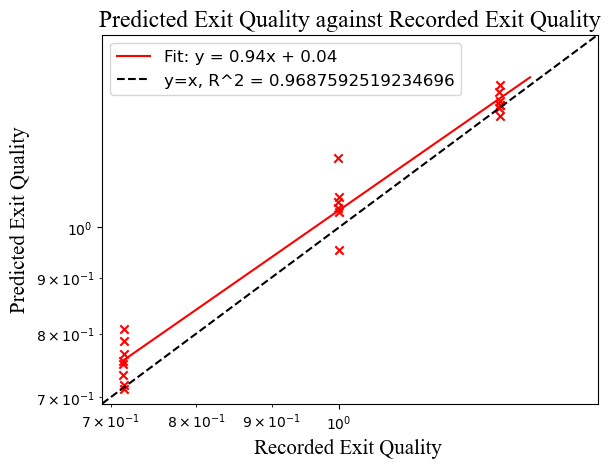

In [186]:
logLogPlotterexitquality(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'], -0.5, 1.5, -0.5, 1.5, 'Exit Quality', 'Exit Quality','')

# MAE temperature

In [187]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['max_wall_temperature'], y_predictions_df['max_wall_temperature'])
print(f'MAE: {mae}')

MAE: 0.01544426455899335


# Log-log Plot

C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


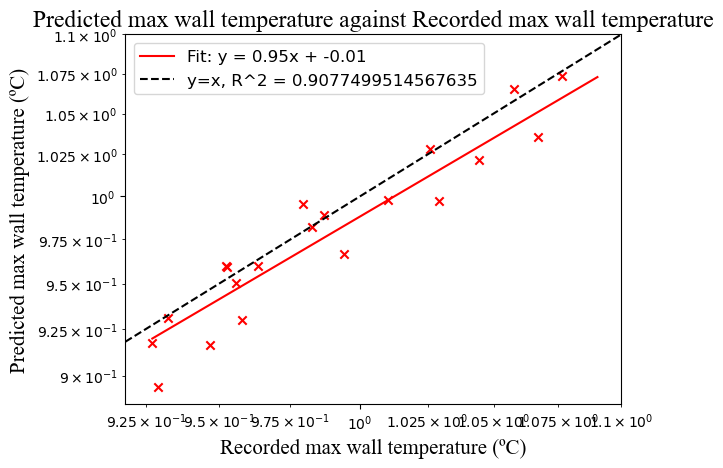

In [202]:
logLogPlotter(y_recorded_df['max_wall_temperature'], y_predictions_df['max_wall_temperature'], 0, 1.1, 0, 1.1, 'max wall temperature', 'max wall temperature', 'ºC')

## (f) Validation Set

In [203]:
y_predictions_df = pd.DataFrame(model.predict(x_validate), columns=['exit_quality', 'max_wall_temperature'])
y_predictions_df[:5]

,exit_quality,max_wall_temperature
0,1.299992,1.028850
1,1.110957,1.053069
2,0.726344,1.023477
3,1.069595,0.926017
4,1.280165,1.008140


In [204]:
y_recorded_df = y_validate
y_recorded_df[:5]

,exit_quality,max_wall_temperature
0,1.285714,1.085330
1,1.000000,1.081720
2,0.712925,1.017394
3,1.000000,0.935346
4,1.284354,1.025599


In [205]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'])
print(f'MAE: {mae}')

MAE: 0.03986584288733344


C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


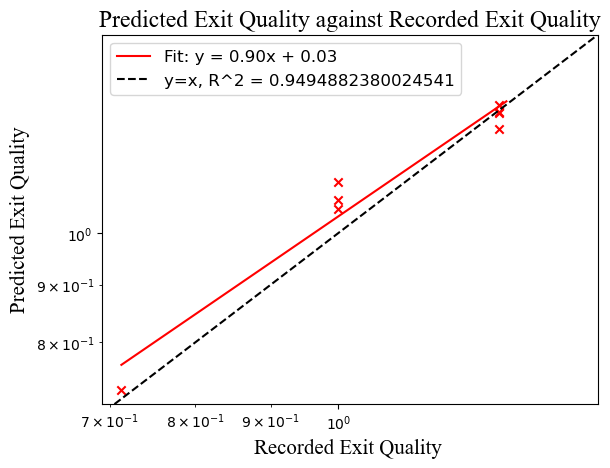

In [206]:
logLogPlotterexitquality(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'], -0.5, 1.5, -0.5, 1.5, 'Exit Quality', 'Exit Quality', '')

In [207]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['max_wall_temperature'], y_predictions_df['exit_quality'])
print(f'MAE: {mae}')

MAE: 0.19710812100747546


C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\GUTIE\anaconda3\envs\Python3-7_Keras_env\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


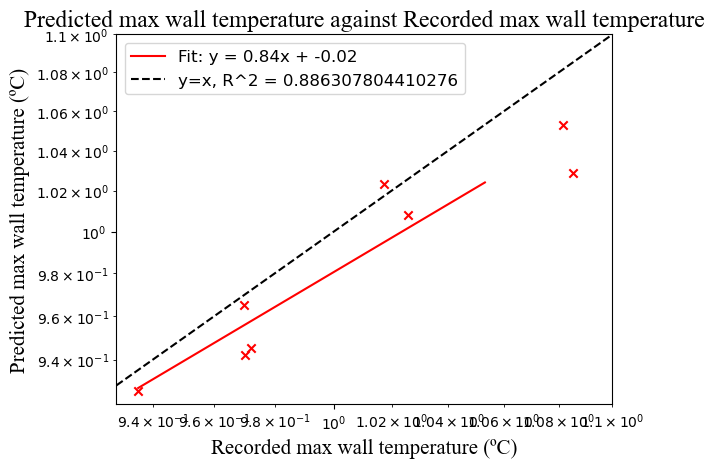

In [208]:
logLogPlotter(y_recorded_df['max_wall_temperature'], y_predictions_df['max_wall_temperature'], 0, 1.1, 0, 1.1, 'max wall temperature', 'max wall temperature', 'ºC')

In [93]:
ydata_df.median()

exit_quality              0.735
max_wall_temperature    304.700
dtype: float64

In [94]:
xdata_df.median()

Di          0.01100
qoflux    850.00000
mdot        0.09265
dtype: float64

## (g)


In [97]:
test = []
numeriter=50
outpt1=np.zeros((numeriter,numeriter))
outpt2=np.zeros((numeriter,numeriter))

#normalized
Di=np.linspace(0.007,0.013,numeriter)
DiNorm=Di/xdata_df.median()['Di']
mdot=np.linspace(0.05,0.15,numeriter)
mdotNorm=mdot/xdata_df.median()['mdot']


rec_massFlowRate = []
rec_D = []

for i in range(len(Di)):
    for j in range(len(mdot)):
        test = [[DiNorm[i] , 750/xdata_df.median()['qoflux'], mdotNorm[j] ]]
        testarray = np.array(test)
        a= model.predict(testarray)
        outpt1[i,j] = a[0,0]
        
        outpt2[i,j] = a[0,1]
        #if np.abs(outpt2[i, j]*304.7 - 310) < 1:
        #    rec_massFlowRate.append(testarray[0][2])
        #    rec_D.append(testarray[0][1])

outpt1=outpt1*ydata_df.median()['exit_quality'] #check
outpt2=outpt2*ydata_df.median()['max_wall_temperature']
print('done')

done


In [ ]:
#rec_massFlowRate_df = pd.DataFrame(rec_massFlowRate, columns=['mdot'])
#rec_massFlowRate_df

In [ ]:
#rec_D_df = pd.DataFrame(rec_D, columns=['Diameter'])
#rec_D_df

In [ ]:
0.75482094 * 0.01100

In [ ]:
0.55056774 * 0.09265

In [ ]:
0.95684114 * 0.0110

In [ ]:
0.86673535 * 0.09265

In [ ]:
outpt1

### Surface Plot: Exit Quality

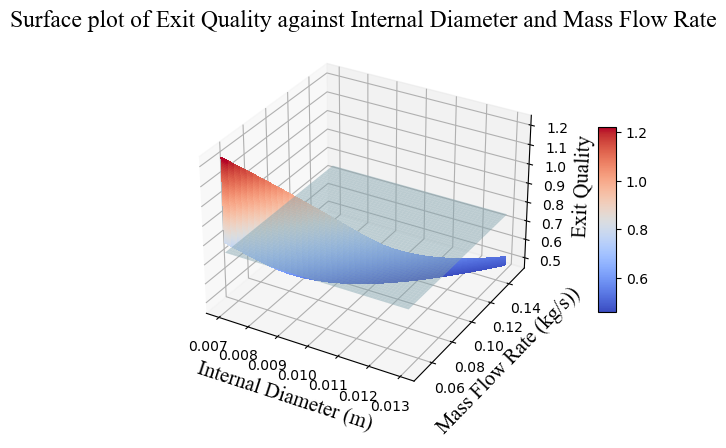

In [100]:
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12
#SETTING UP PLOT

#Surface Plot
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Di, mdot, outpt1,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Create a plane in the XY plane at Z = 310
z_plane = 0.75
x_range = np.linspace(Di.min(), Di.max(), 100)  # Adjust based on your Di range
y_range = np.linspace(mdot.min(), mdot.max(), 100)  # Adjust based on your mdot range
X, Y = np.meshgrid(x_range, y_range)
Z = np.full_like(X, z_plane)
# Plot the plane
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5) 




fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
plt.xlabel("Internal Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("Mass Flow Rate (kg/s))", fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('Exit Quality', fontsize=label_font_size, fontfamily=font_family)
plt.title('Surface plot of Exit Quality against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)
plt.show()

### Surface Plot: Max Wall Temp 

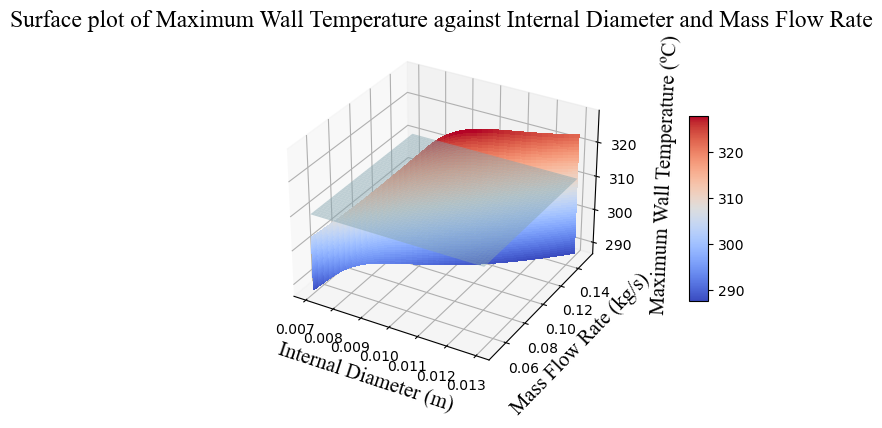

In [158]:
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12
#SETTING UP PLOT

#Surface Plot
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Di, mdot, outpt2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Create a plane in the XY plane at Z = 310
z_plane = 310
x_range = np.linspace(Di.min(), Di.max(), 100)  # Adjust based on your Di range
y_range = np.linspace(mdot.min(), mdot.max(), 100)  # Adjust based on your mdot range
X, Y = np.meshgrid(x_range, y_range)
Z = np.full_like(X, z_plane)
# Plot the plane
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5) 



fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.15)
plt.xlabel("Internal Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("Mass Flow Rate (kg/s)", fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('Maximum Wall Temperature (ºC)', fontsize=label_font_size, fontfamily=font_family, labelpad=10)
plt.title('Surface plot of Maximum Wall Temperature against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)
plt.show()



In [99]:
pd.DataFrame(outpt2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,287.572201,288.481331,289.404192,290.340364,291.202474,291.896989,292.432046,292.814946,293.050428,293.148682,...,287.409910,287.374567,287.349032,287.333032,287.326403,287.328964,287.340514,287.360837,287.390786,287.431885
1,287.785454,288.694421,289.617644,290.554398,291.472046,292.234231,292.833380,293.277339,293.571138,293.720226,...,288.050485,288.010130,287.979637,287.958769,287.947364,287.945239,287.952177,287.967941,287.992423,288.027093
2,288.003828,288.912341,289.835764,290.773117,291.719824,292.551695,293.216516,293.722823,294.076864,294.279837,...,288.696782,288.651323,288.615854,288.590064,288.573846,288.566981,288.569215,288.580421,288.600416,288.629130
3,288.227415,289.135437,290.058661,290.996504,291.948041,292.848345,293.580854,294.150890,294.566245,294.826318,...,289.348817,289.298273,289.257737,289.227008,289.205904,289.194226,289.191774,289.198367,289.213768,289.237868
4,288.456232,289.363746,290.286661,291.224649,292.176931,293.123656,293.925433,294.561178,295.038899,295.359014,...,290.006719,289.950945,289.905323,289.869581,289.843592,289.827065,289.819855,289.821762,289.832586,289.852146
5,288.690443,289.597448,290.519927,291.457789,292.410616,293.376900,294.249562,294.952668,295.494299,295.876454,...,290.670450,290.609464,290.558684,290.517893,290.486910,290.465497,290.453474,290.450677,290.456852,290.471854
6,288.930103,289.836491,290.758624,291.696268,292.649258,293.616869,294.552733,295.324689,295.931811,296.377513,...,291.340102,291.273831,291.217857,291.171963,291.135967,291.109614,291.092760,291.085169,291.086658,291.097065
7,289.175229,290.081036,291.002770,291.940196,292.893150,293.861287,294.834363,295.676768,296.350725,296.861409,...,292.015711,291.944119,291.882896,291.831880,291.790781,291.759452,291.737676,291.725290,291.722039,291.727778
8,289.425967,290.331174,291.252491,292.189681,293.142544,294.110862,295.094219,296.008252,296.750660,297.327416,...,292.697350,292.620400,292.553874,292.497628,292.451443,292.415084,292.388350,292.371060,292.363051,292.364086
9,289.682354,290.586980,291.507788,292.444705,293.397514,294.365959,295.349824,296.318615,297.131017,297.775116,...,293.385073,293.302674,293.230827,293.169296,293.117953,293.076490,293.044798,293.022605,293.009728,293.006005


Text(0, 0.5, 'Mass Flow Rate (kg/s)')

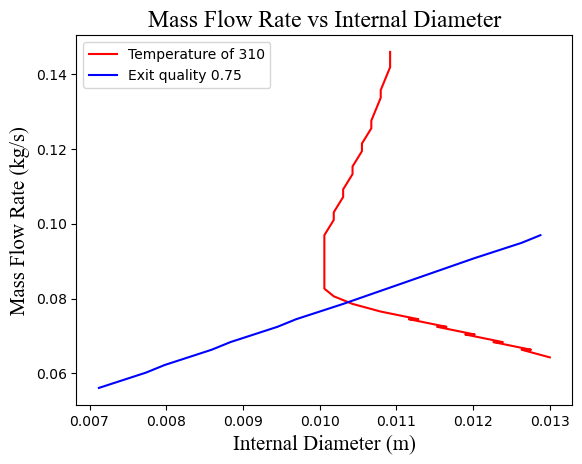

In [166]:
mdot_max=[]
Di_max=[]
for j in range(len(mdot)):
    for i in range(len(Di)):    
        if outpt2[i][j]>309.5:
            if outpt2[i][j]<310:
                mdot_max.append(mdot[j])
                Di_max.append(Di[i])
    
#print(mdot_max)
plt.plot(Di_max, mdot_max, color='red')

#visuals
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12

mdot_max=[]
Di_max=[]
for j in range(len(mdot)):
    for i in range(len(Di)):    
        if outpt1[i][j]>0.745:
            if outpt1[i][j]<0.75:
                mdot_max.append(mdot[j])
                Di_max.append(Di[i])
    
#print(mdot_max)
plt.plot(Di_max, mdot_max, color='blue')

#visuals
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12

plt.legend([ 'Temperature of 310','Exit quality 0.75'])
plt.title('Mass Flow Rate vs Internal Diameter', fontsize=title_font_size, fontfamily=font_family)
plt.xlabel('Internal Diameter (m)', fontsize=label_font_size, fontfamily=font_family)
plt.ylabel('Mass Flow Rate (kg/s)', fontsize=label_font_size, fontfamily=font_family)



# h

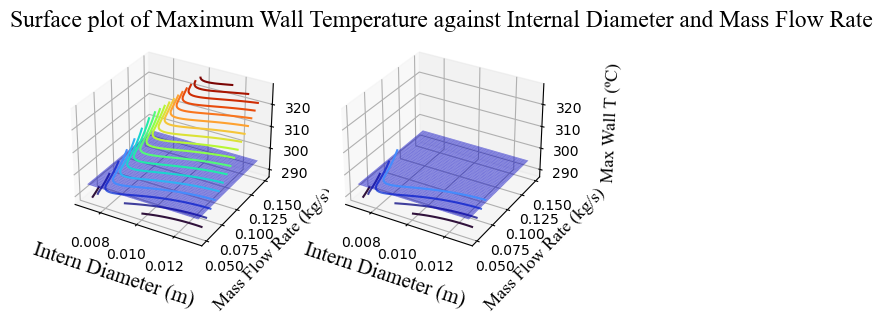

In [159]:
X=Di
Y=mdot
Z=outpt2
X2, Y2 = np.meshgrid(x_range, y_range)
Z2 = np.full_like(X2, z_plane)
fig = plt.figure()
for which in ['left', 'right']:

    ax = fig.add_subplot(121 + (which == 'right'), projection="3d")
    ax.computed_zorder = False
    plt.xlabel("Intern Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel("Mass Flow Rate (kg/s)", fontsize=label_font_size-2, fontfamily=font_family)
    ax.set_zlabel('Max Wall T (ºC)', fontsize=label_font_size-2, fontfamily=font_family, labelpad=10)
    #plt.title('Surface plot of Maximum Wall Temperature against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)

    layers = np.linspace(Z.min(), Z.max(), 20)[1:-1]
    colors = plt.get_cmap('turbo', len(layers)).colors

    special_z = 295
    plane_drawn = False
    for layer, color in zip(layers, colors):
        if layer >= special_z and not plane_drawn:
            ax.plot_surface(X2, Y2, np.full_like(Z2, special_z), color='blue', alpha=0.5, zorder=2)
            plane_drawn = True
        ax.contour(X, Y, Z, levels=[layer], offset=layer, colors=[color])
        if plane_drawn and which == 'right':
            break
plt.xlabel("Intern Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("Mass Flow Rate (kg/s)", fontsize=label_font_size-2, fontfamily=font_family)
ax.set_zlabel('Max Wall T (ºC)', fontsize=label_font_size-2, fontfamily=font_family, labelpad=10)
plt.title('Surface plot of Maximum Wall Temperature against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)

plt.show()

Text(0, 0.5, 'Mass Flow Rate (kg/s)')

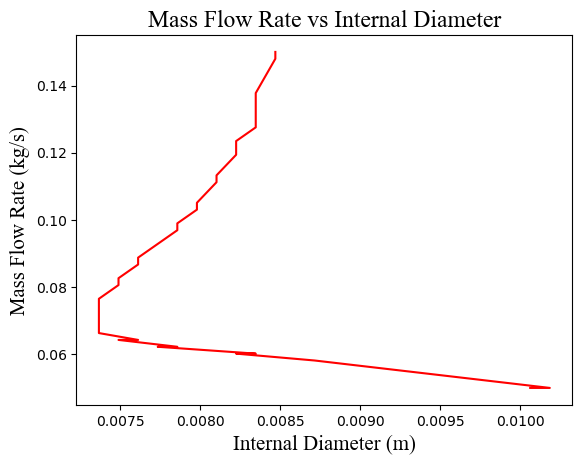

In [149]:
#plot m flow rate vs Di'

#y_range = np.linspace(mdot.min(), mdot.max(), 100)  # Adjust based on your mdot range
#x_range = np.linspace(Di.min(), Di.max(), 100)  # Adjust based on your Di range

mdot_max=[]
Di_max=[]
for j in range(len(mdot)):
    for i in range(len(Di)):    
        if outpt2[i][j]>294.5:
            if outpt2[i][j]<295:
                mdot_max.append(mdot[j])
                Di_max.append(Di[i])
    
#print(mdot_max)
plt.plot(Di_max, mdot_max, color='red')

#visuals
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12

plt.title('Mass Flow Rate vs Internal Diameter', fontsize=title_font_size, fontfamily=font_family)
plt.xlabel('Internal Diameter (m)', fontsize=label_font_size, fontfamily=font_family)
plt.ylabel('Mass Flow Rate (kg/s)', fontsize=label_font_size, fontfamily=font_family)
